In [ ]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

BASIC IMAGE MANIPULATION

In [ ]:
# Open an image in python
image = io.imread('quadrat_photos_raw/20240530_164149.jpg')
print(image)


In [ ]:
# Make a lightened version of that image by multiplying its RGB values
darkened_image = image * .5
plt.imshow(darkened_image)

In [ ]:
# Make an overlay on top of the image.
# Make a red image.
image[10:500, 10:500, :] = [255, 0, 0] # parameters of [] are x, y, z pixel ranges
plt.imshow(image)

In [ ]:
# Make a random image that's 500 by 500 pixels. All pixels will be randomized. 
random_pic = np.random.random([500, 500])

# Display that image using matplotlib
plt.imshow(random_pic)

how to pillow library 

In [ ]:
img = Image.open('quadrat_photos_raw/20240531_103859.jpg')

# Print image type
print(type(img)) # Note that it's not a numpy array. It needs to be converted if you want to do numpy stuff.

# img.show() # Open the image in a separate window.
print(img.format) # print the format of the image (JPEG)

img1 = np.asarray(img) # Convert a pillow image to a numpy array
print(type(img1)) # Show datatype of new image, which is a numpy array

Matplotlib & Pyplot image opening

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
# Import an image as a numpy array
img = mpimg.imread('quadrat_photos_raw/20240531_103859.jpg')
print(type(img))
plt.imshow(img) # remember to use imshow for numpy arrays

Scikit image library

In [ ]:
from skimage import io # For reading in images
from skimage import io, img_as_float, img_as_ubyte

# Import image as a numpy array
img = io.imread('quadrat_photos_raw/20240531_103859.jpg') # Import image as a numpy array
print(type(img))
plt.imshow(img)

# Import image as a float. It converts pixel values into a number from 0-1.
img_float = img_as_float(img)
# img_float = io.imread('quadrat_photos/20240531_103859.jpg').astype(np.float) # alternate method
print(img_float)

Open CV

In [ ]:

import cv2 # import command for open cv


In [ ]:
img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 1) # read in image (1 means in color, 0 means in monochrome)
plt.imshow(img) # show image. Notice how the colors are off. cv2's default is not RGB. It's BGR.

# Try using open cv methods of showing images.
gray_img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 0)
color_img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 1)

# Import it but convert the images from BGR to RGB
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))

cv2.imshow('Gray Image', gray_img)
cv2.imshow('Color Image', color_img)

cv2.waitKey(0) # Keep the output window until you kill it (unless you put in 0 - that makes you able to close it manually)
cv2.destroyAllWindows() # Destroys all the windows that show up 

Reading all images

In [ ]:
import cv2
import glob

The * in the path designates which files the for loop will search through. Rad! Be warned, it will show every image in succession.

In [ ]:
path = 'quadrat_photos_raw/*.jpg'

# Loop through every file in the quadrat_photos folder and do operations on every one.
for file in glob.glob(path):
    print(file)
    a = cv2.imread(file)
    print(a)

    # Convert to RGB
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    # Show image
    cv2.imshow('Color Image', c)

    # Clean up windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


IMAGE PROCESSING WITH PILLOW

In [ ]:
from PIL import Image

Resizing

In [ ]:
# Open the image. It is not a numpy array.
img = Image.open('quadrat_photos_raw/436552676_1025526125801177_8782775392322481521_n.jpg')

print(img.size) # Print the size - (width, height)

# Resize the image. It does an unexciting squish. Doesn't keep the aspect ratio. Bad thing
# small_img = img.resize((200, 300)) # make a copy that's smaller
# small_img.save('quadrat_photos_edited/test_small_image.jpg') # Save the image

small_img = img

# Resize but keep the aspect ratio. Better method.
small_img.thumbnail((510, 287))
small_img.save('quadrat_photos_edited/test_small_image_aspect_ratio.jpg') # Save the image

# You can't resize an image to be bigger than it is.


Cropping

In [ ]:
cropped_img = img.crop((0, 0, 300, 300)) # crop image to a square
cropped_img.save('quadrat_photos_edited/test_cropped_image.jpg')

# Put a cropped version of one image on top of another (no workie. But doesn't rlly matter)
img1 = Image.open('quadrat_photos_raw/441870424_993834382360394_2048396322547840220_n.jpg')
img2 = Image.open('quadrat_photos_raw/441575503_1505677643398773_3256282308229328881_n.jpg')

# Crop one image to make it smaller
img2 = img2.crop((10, 10, 20, 20))

# Copy image into another variable
img1_copy = img1.copy()
# Paste image 2 onto img1 @ the location 50, 50
img1_copy.paste(img2, (50, 50)) 
img1_copy.save('quadrat_photos_edited/test_bad_photoshop.jpg')

Rotation

In [ ]:
img90_deg_rotated = img.rotate(90, expand = True) 
img90_deg_rotated.save('quadrat_photos_edited/rotated_90.jpg')

# expand = True means it expands the bounds of the image to accomodate the rotation


IMAGE PROCESSING WITH SCIPY

In [ ]:
from skimage import io, img_as_ubyte
import numpy as np
from matplotlib import pyplot as plt

Scipy: load image, flip image, use color maps  
Documentation for all the available color maps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [ ]:
# Load in image as gray, then convert it back to ubyte
img = img_as_ubyte(io.imread('quadrat_photos_raw/441959955_1200760134272433_6935347568072997467_n.jpg', as_gray=True))

# Print image size and datatype.
print(img.shape, img.dtype) # (1148, 2040, 3), unsigned integer int
# print(img)

print(img[0,0]) # Prints RGB values of the pixel at [0,0]

# Flip images
flipped_lr = np.fliplr(img) # left to right
flipped_ud = np.flipud(img) # up to down

# Plot multiple images
plt.subplot(2,1,1) # (cols, rows, images)
plt.imshow(img, cmap = 'GnBu_r') # reversed GnBu
plt.subplot(2,2,3)
plt.imshow(flipped_lr, cmap = 'CMRmap')
plt.subplot(2,2,4)
plt.imshow(flipped_ud, cmap = 'magma')

# If you want to apply gradient maps, use the cmap argument and take a map from https://matplotlib.org/stable/gallery/color/colormap_reference.html 
# In order to make it work properly, the images must be gray (see img_as_ubyte kerfluffle above)
# Reverse the gradient by appending '_r' to the name, like in the green blue one.



Scipy: rotate

In [ ]:
from scipy import ndimage

In [ ]:

img = img_as_ubyte(io.imread('quadrat_photos_raw/441959955_1200760134272433_6935347568072997467_n.jpg', as_gray=True))

# Rotate image 90 degrees
rotated = ndimage.rotate(img, 90) # reshape argument will control cropping with rotation
plt.imshow(rotated) 


Scipy: filters  
Here's a list of all the filters u can use: https://docs.scipy.org/doc/scipy/reference/ndimage.html

In [ ]:
# DE-NOISING, SMOOTHING
# Uniform filter blurs the image.
uniform_filtered = ndimage.uniform_filter(img, size=3)
# Gaussian filter adds a gaussian blur. Doesn't preserve edges. 
gaussian_filtered = ndimage.gaussian_filter(img, sigma=3)
# De-noised but does preserve edges
median_filtered = ndimage.median_filter(img, 3)

# EDGE DETECTION
sobel_img = ndimage.sobel(img) # Looks like it picks up the quadrat well, and the rest is noise. Tinker with the axis argument to adjust. 

plt.imshow(sobel_img)

IMAGE PROCESSING WITH SCIKIT-IMAGE

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
img = io.imread('quadrat_photos_raw/441951468_751377703815276_4256953090677514527_n.jpg', as_gray=True)

# Scale image by 1/4, add anti-aliasing
rescaled_img = rescale(img, 1.0/4.0, anti_aliasing = True)
# Scale image down to specified pixels. Will squish image. 
resized_img = resize(img, (200, 200))

plt.imshow(rescaled_img)

Edge detection

In [ ]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [ ]:
edge_roberts = roberts(img) # Apply roberts edge detection mode
edge_sobel = sobel(img) # Apply sobel edge detection mode
edge_scharr = scharr(img) # Apply scharr edge detection mode
edge_prewitt = prewitt(img) # Apply prewitt edge detection mode

plt.imshow(edge_roberts)
plt.imshow(edge_sobel)
plt.imshow(edge_scharr)
plt.imshow(edge_prewitt)

# Use different methods depending on what works the best for your data.

In [ ]:
from skimage.feature import canny

In [ ]:
edge_canny = canny(img, sigma=4)
# sigma adjusts the sensitivity of the edge detection.

plt.imshow(edge_canny)

Deconvolution

In [ ]:
from skimage import restoration
import numpy as np

In [ ]:
# Create a 3x3 matrix with 9 ones. Normalize the matrix by dividing by 9.
psf = np.ones((3,3)) / 9

# Deconvolute the image. 
deconvolved, _ = restoration.unsupervised_wiener(img, psf)

# Save the image to the edited quadrat photos folder.
plt.imsave('quadrat_photos_edited/deconvolved.jpg', deconvolved)

Using entropy filter for segmentation

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, restoration
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold

In [ ]:
# Import the image as gray (it needs to be grayscale or else the entropy function no workie). 
img = io.imread('quadrat_photos_raw/442006991_1175880083845572_7503037711238909895_n.jpg', as_gray = True)

# Apply entropy filter
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

In [ ]:
# Show different methods of segmentation???
fig, ax = try_all_threshold(entropy_img, figsize=(10,8), verbose=False)

In [ ]:
from skimage.filters import threshold_isodata
import numpy as np

In [ ]:
# Thresh is one value that says what the threshold is for that image. You know, whatever that means.
thresh = threshold_isodata(entropy_img)

# Binary is a matrix of the image, and all the dark pixels are True and all the light pixels are False.
binary = entropy_img <= thresh

# Show the binary image in black and white. 
plt.imshow(binary, cmap='gray')

Entropy filter example

In [ ]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu



In [ ]:
# Import image in grayscale
img2 = io.imread('quadrat_photos_raw/20240531_103700.jpg', as_gray=True)

# Add entropy filter
entropy_img2 = entropy(img, disk(5))

plt.imshow(entropy_img2)

# Check the different threshold options
# fig, ax = try_all_threshold(entropy_img, figsize=(10,8), verbose=False)
# Otsu picks out the pipe the best so we'll use that one. 

thresh2 = threshold_otsu(entropy_img2)

binary2 = entropy_img2 <= thresh2

plt.imshow(binary2, cmap = 'gray')




Use a loop to binarize several photos

In [ ]:
import glob # for file names
import numpy as np

In [ ]:
area_list = []
index_list = []
path = 'quadrat_photos_raw/*'

# Do 5 line image analysis on every image in the file to see if the dark area increases or decreases. Mainly makes sense in scratch assay analysis but not here.
for i, file in enumerate(glob.glob(path)):
    # read the image in
    img = io.imread(file, as_gray = True)

    # Apply entropy filter
    entropy_img = entropy(img, disk(10))

    # Establish threshold value
    thresh = threshold_otsu(entropy_img)

    # Make a binary image that separates pixels that are and aren't over the threshold
    binary = entropy_img <= thresh
    
    # Save the dark area in pixels (???)
    dark_area = np.sum(binary == True)

    # Append index and areas into lists so they can be plotted later. 
    index_list.append(i)
    area_list.append(dark_area)

# Plot the areas over time.
plt.plot(index_list, area_list, 'bo')

SCIKIT IMAGE NON-LOCAL MEANS DENOISING

In [ ]:
from skimage import io
from scipy import ndimage as nd
from matplotlib import pyplot as plt

In [ ]:
# This image has shadows over the top of that. Maybe denoising will help?
noisy_img = io.imread('quadrat_photos_raw/441945392_7611293982323093_6609539894515730557_n.jpg', as_gray = True)

# Apply medain filter (does what gaussian filter does but preserves edges)
median_img = nd.median_filter(noisy_img, size = 3) # size measures in kernels

plt.imsave('quadrat_photos_edited/denoised.jpg', median_img)
# It looks pretty sweet but it didn't solve the shadow problem


Try non-local means for digital photos. Info is in this video: https://www.youtube.com/watch?v=2PrzKWkqOtU&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=23  
There is also some documentation and copy-able code here: https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html

HISTOGRAM BASED SEGMENTATION

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [ ]:
# Load in image
img = io.imread('quadrat_photos_raw/442006967_421825957362171_8934033133085778559_n.jpg', as_gray=True)

# DE-NOISING
# Convert the image to a float in order to make this work
img = img_as_float(img)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

# Denoise the image based on the sigma that was just found
denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Convert it back to ubyte
denoised_ubyte = img_as_ubyte(denoised)

plt.imshow(denoised_ubyte, cmap='gray')


(array([    0.,   180.,   858.,  3711.,  4467., 10881., 10054., 19259.,
        14804., 23965., 26615., 18727., 30123., 20880., 32711., 22522.,
        34736., 23728., 36521., 25077., 38592., 40127., 26864., 41798.,
        28421., 43292., 29886., 44865., 30209., 46215., 46275., 31701.,
        48018., 32189., 48694., 32448., 49615., 33289., 50574., 33821.,
        50577., 50445., 33481., 50622., 33292., 50135., 33353., 49734.,
        33046., 49794., 49323., 32285., 48208., 31915., 46190., 29751.,
        43785., 28279., 41216., 25951., 37640., 35114., 22134., 31152.,
        19127., 26684., 16285., 21934., 13485., 17852., 15619.,  9110.,
        11988.,  7074.,  9263.,  5227.,  6624.,  3772.,  5072.,  3038.,
         3833.,  3372.,  2059.,  2995.,  1667.,  2363.,  1719.,  2214.,
         1623.,  2519.,  2700.,  2028.,  3182.,  2496.,  4193.,  3240.,
         6499.,  7210., 14615.,  5105.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

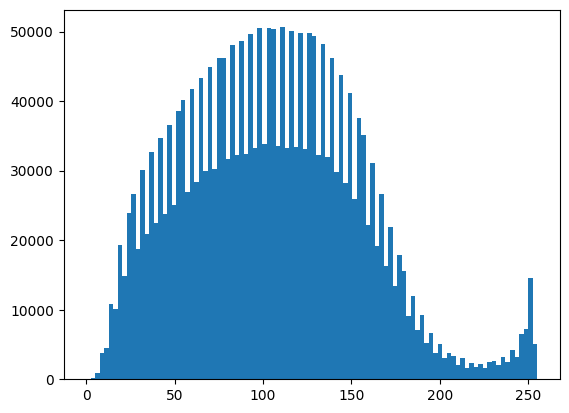

In [14]:
# View histogram
plt.hist(denoised_ubyte.flat, bins=100, range=(0,255)) # .flat flattens array into 1D (bc histogram 1D)